In [124]:
import pandas as pd
import numpy as np

In [288]:
data=pd.read_csv("train_NIR5Yl1.csv")

In [289]:
data.shape

(330045, 7)

In [290]:
data.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


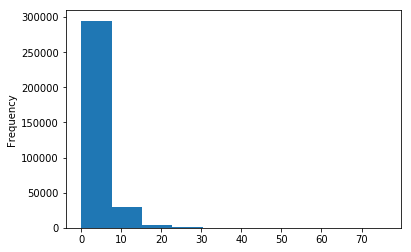

In [291]:
data["Answers"].plot(kind="hist")

In [293]:
data["Tag"].value_counts()

c    72458
j    72232
p    43407
i    32400
a    31695
s    23323
h    20564
o    14546
r    12442
x     6978
Name: Tag, dtype: int64

In [215]:
import seaborn as sns

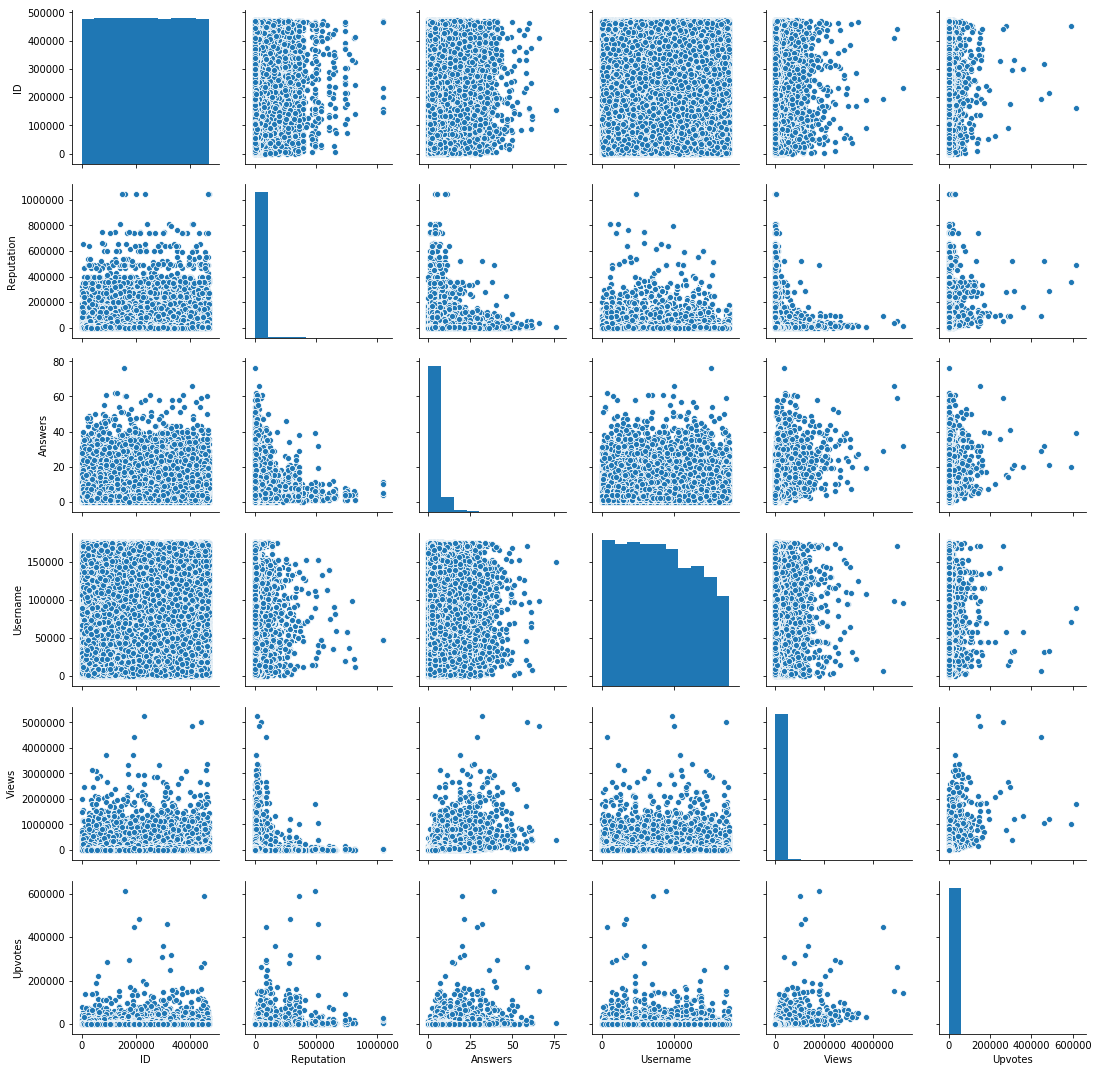

In [216]:
sns.pairplot(data)

In [217]:
data.Tag.unique()

array(['a', 'c', 'r', 'j', 'p', 's', 'h', 'o', 'i', 'x'], dtype=object)

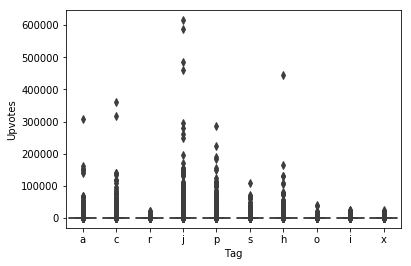

In [218]:
import matplotlib.pyplot as plt
sns.boxplot(data.Tag,data.Upvotes)

In [294]:
data.groupby("Tag").Upvotes.sum()

Tag
a    10030204.0
c    23735061.0
h     7911376.0
i     3803327.0
j    39031622.0
o     1631440.0
p    17681927.0
r      983257.0
s     5528283.0
x     1055459.0
Name: Upvotes, dtype: float64

In [19]:
len(data.Username.unique())
#or
data.Username.nunique()

141802

In [20]:
data.shape

(330045, 7)

In [26]:
data.Username.value_counts().head()

4118     797
17878    608
45704    483
23223    413
6697     408
Name: Username, dtype: int64

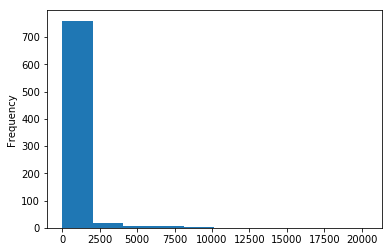

In [39]:
data[data["Username"]==4118]["Upvotes"].plot(kind="hist")

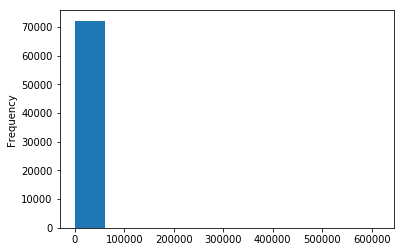

In [6]:
data[data["Tag"]=="j"]["Upvotes"].plot(kind="hist")

In [225]:
data=pd.concat([data,pd.get_dummies(data["Tag"])],axis=1)

In [226]:
data.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,a,c,h,i,j,o,p,r,s,x
0,52664,a,3942.0,2.0,155623,7855.0,42.0,1,0,0,0,0,0,0,0,0,0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0,1,0,0,0,0,0,0,0,0,0
2,468453,c,1358.0,4.0,56177,8067.0,60.0,0,1,0,0,0,0,0,0,0,0
3,96996,a,264.0,3.0,168793,27064.0,9.0,1,0,0,0,0,0,0,0,0,0
4,131465,c,4271.0,4.0,112223,13986.0,83.0,0,1,0,0,0,0,0,0,0,0


In [227]:
data.drop(labels="Tag",axis=1,inplace=True)

In [228]:
data.drop(labels="Username",axis=1,inplace=True)

In [229]:
dep=data["Upvotes"]
data.drop(labels="Upvotes",axis=1,inplace=True)

In [230]:
from scipy.stats import zscore

In [231]:
data=data.apply(zscore)

In [232]:
data.head()

,ID,Reputation,Answers,Views,a,c,h,i,j,o,p,r,s,x
0,-1.345823,-0.141573,-0.535736,-0.269158,3.068087,-0.530373,-0.257773,-0.329931,-0.529313,-0.21472,-0.389146,-0.197926,-0.275753,-0.146967
1,0.675638,0.675238,2.257943,0.323087,3.068087,-0.530373,-0.257773,-0.329931,-0.529313,-0.21472,-0.389146,-0.197926,-0.275753,-0.146967
2,1.710568,-0.237059,0.023000,-0.266540,-0.325936,1.885466,-0.257773,-0.329931,-0.529313,-0.21472,-0.389146,-0.197926,-0.275753,-0.146967
3,-1.019946,-0.277486,-0.256368,-0.031882,3.068087,-0.530373,-0.257773,-0.329931,-0.529313,-0.21472,-0.389146,-0.197926,-0.275753,-0.146967
4,-0.766571,-0.129415,0.023000,-0.193426,-0.325936,1.885466,-0.257773,-0.329931,-0.529313,-0.21472,-0.389146,-0.197926,-0.275753,-0.146967


In [233]:
data.drop(labels="ID",axis=1,inplace=True)

In [234]:
X=data[["Reputation","Answers","Views","a","c","h","i","j","o","p","r","s","x"]]
y=dep

In [235]:
from sklearn.model_selection import train_test_split

In [236]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [237]:
from sklearn.linear_model import LinearRegression

In [238]:
lr=LinearRegression()

In [239]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [240]:
lr.score(X_test,y_test)

0.3043043762566052

In [241]:
from sklearn.linear_model import Ridge
u=Ridge()
u.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [242]:
print(u.score(X_train,y_train))
print(u.score(X_test,y_test))
print('Number of non-zero features: {}'.format(np.sum(u.coef_ != 0)))

0.24886156120546854
0.30430519535642075
Number of non-zero features: 13


In [243]:
pred=u.predict(X_test)

In [244]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [245]:
mean_absolute_percentage_error(pred,y_test)

210.43272767016072

In [266]:
from sklearn.linear_model import Lasso
u=Lasso()
u.fit(X,y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [267]:
test=pd.read_csv("test_8i3B3FC.csv")
t=test

In [268]:
test.shape

(141448, 6)

In [269]:
test.drop(["ID","Username"],1,inplace=True)

In [270]:
test=pd.concat([test,pd.get_dummies(test["Tag"])],axis=1)

In [271]:
test.drop(labels="Tag",axis=1,inplace=True)

In [272]:
#t["Answers"].value_counts()

In [273]:
test.head()

,Reputation,Answers,Views,a,c,h,i,j,o,p,r,s,x
0,5645.0,3.0,33200.0,1,0,0,0,0,0,0,0,0,0
1,24511.0,6.0,2730.0,0,1,0,0,0,0,0,0,0,0
2,927.0,1.0,21167.0,0,0,0,1,0,0,0,0,0,0
3,21.0,6.0,18528.0,0,0,0,1,0,0,0,0,0,0
4,4475.0,10.0,57240.0,0,0,0,1,0,0,0,0,0,0


In [274]:
test=test.apply(zscore)

In [275]:
test.head()

,Reputation,Answers,Views,a,c,h,i,j,o,p,r,s,x
0,-0.081543,-0.255734,0.041742,3.071288,-0.527522,-0.257286,-0.332746,-0.527719,-0.215835,-0.39047,-0.197554,-0.277122,-0.147053
1,0.594400,0.582853,-0.337505,-0.325596,1.895656,-0.257286,-0.332746,-0.527719,-0.215835,-0.39047,-0.197554,-0.277122,-0.147053
2,-0.250583,-0.814791,-0.108028,-0.325596,-0.527522,-0.257286,3.005291,-0.527719,-0.215835,-0.39047,-0.197554,-0.277122,-0.147053
3,-0.283044,0.582853,-0.140874,-0.325596,-0.527522,-0.257286,3.005291,-0.527719,-0.215835,-0.39047,-0.197554,-0.277122,-0.147053
4,-0.123463,1.700969,0.340957,-0.325596,-0.527522,-0.257286,3.005291,-0.527719,-0.215835,-0.39047,-0.197554,-0.277122,-0.147053


In [276]:
X_train.head()

,Reputation,Answers,Views,a,c,h,i,j,o,p,r,s,x
144606,-0.286650,-0.535736,-0.341827,3.068087,-0.530373,-0.257773,-0.329931,-0.529313,-0.21472,-0.389146,-0.197926,-0.275753,-0.146967
251664,-0.286244,-0.535736,-0.174194,-0.325936,-0.530373,-0.257773,-0.329931,1.889242,-0.21472,-0.389146,-0.197926,-0.275753,-0.146967
248598,-0.284396,-0.815104,-0.343285,-0.325936,-0.530373,3.879388,-0.329931,-0.529313,-0.21472,-0.389146,-0.197926,-0.275753,-0.146967
255788,-0.284913,0.302368,-0.360393,-0.325936,-0.530373,-0.257773,-0.329931,-0.529313,-0.21472,-0.389146,-0.197926,3.626438,-0.146967
327167,-0.254168,0.023000,-0.044642,-0.325936,-0.530373,-0.257773,-0.329931,1.889242,-0.21472,-0.389146,-0.197926,-0.275753,-0.146967


In [277]:
#test=test.drop(labels="Upvotes",axis=1)

In [278]:
our=u.predict(test)

In [279]:
our=np.abs(our)

In [195]:
#import torch

In [281]:
submission=pd.read_csv("sample_submission_OR5kZa5.csv")

In [282]:
submission.head()

,ID,Upvotes
0,7,500
1,9,500
2,12,500
3,13,500
4,16,500


In [283]:
submission.shape

(141448, 2)

In [284]:
submission["Upvotes"]=our

In [285]:
submission.head()

,ID,Upvotes
0,7,366.107605
1,9,220.268904
2,12,168.424506
3,13,94.898064
4,16,680.585176


In [286]:
submission.shape

(141448, 2)

In [287]:
submission.to_csv('submission3.csv', index=False)